## ML Final Project

**Scenario:** You work at a multinational bank that is aiming to increase it's market share in 
Europe. Recently, it has been noticed that the number of customers using the banking 
services has declined, and the bank is worried that existing customers have stopped 
using them as their main bank. <br> 

As a data scientist, you are tasked with **finding out the 
reasons behind customer churn (when a customer stops using them as the main bank) and to predict customer churn**. <br> 

The marketing team, 
in particular, is interested in your findings and want to better understand existing 
customer behavior and possibly predict customer churn. Your results will help the 
marketing team to use their budget wisely to target potential churners. To achieve 
this objective, in this exercise, you will import the banking data (Churn_Modelling.csv) 
provided by the bank and do some machine learning to solve their problem.

Data dictionary

- CustomerID: Unique ID of each customer
- CredRate: Credit Score of the customer 
- Geography: Country customer is from 
- Gender
- Age
- Tenure: How long customer has been with bank 
- Prod Number: Number of products customer has with bank (Numerical)
- HasCrCard: Does customer have credit card
- ActMem: Is customer active member 
- Estimated salary: Annual estimated salary of customer 
- Exited: Whether customer has churned (1 is yes)
- Balance: Amount of money customer has/had with bank
- Active member: Whether customer was actively engaged with bank activities

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
data = pd.read_csv(r"Churn_Modelling.csv")

In [3]:
data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [4]:
# Get info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [5]:
# Check total no of customers
data['CustomerId'].unique

<bound method Series.unique of 0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64>

In [6]:
# Check for any missing values
data.isnull().values.any()

True

In [7]:
# Check for missing values in each column
data.isna().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [8]:
# Check total rows and columns
data.shape

(10000, 12)

In [9]:
# Display only thos rows with null values
data[data.isna().any(axis=1)]

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
6,15592531,822,France,NaN,50.0,7,0.00,2,1,1,10062.80,0
10,15767821,528,France,Male,NaN,6,102016.72,2,0,0,80181.12,0
11,15737173,497,Spain,Male,NaN,3,0.00,2,1,0,76390.01,0
12,15632264,476,France,Female,NaN,10,0.00,2,1,0,26260.98,0
37,15729599,804,Spain,Male,NaN,7,76548.60,1,0,1,98453.45,0
38,15717426,850,France,Male,NaN,7,0.00,1,1,1,40812.90,0
39,15585768,582,Germany,Male,NaN,6,70349.48,2,0,1,178074.04,0
74,15770811,519,France,Male,36.0,9,0.00,2,0,1,NaN,0
77,15662085,678,France,Female,32.0,9,0.00,1,1,1,NaN,0
87,15625759,729,France,Male,30.0,9,0.00,2,1,0,NaN,0


In [10]:
# Copy original data into new dataframe
cdata = data.copy()
cdata.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [11]:
# Fill those integer columns null cell with mean of column
cdata.fillna(cdata.mean(), inplace=True)


In [12]:
# Check for null values
cdata.isnull().values.any()

True

In [13]:
# Drop rows with null values that unable to replace with mean of columns
Final_data = cdata.dropna()

In [14]:
Final_data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [15]:
# Check final rows and columns
Final_data.shape

(9996, 12)

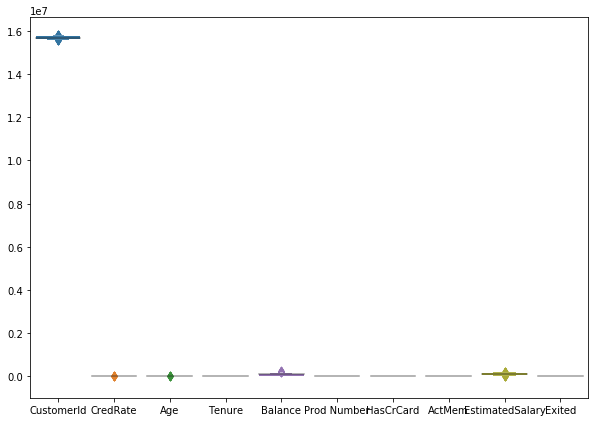

In [16]:
# Overall data overview
plt.figure(figsize=(10 , 7))
sns.boxenplot(data= Final_data)

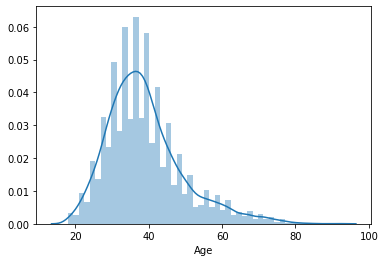

In [17]:
# Overall Customers Age Distribution
sns.distplot(Final_data.Age)

In [18]:
# Find out total number of stayed and exited customers
Final_data.Exited.value_counts()

0    7960
1    2036
Name: Exited, dtype: int64

In [19]:
# Overall Country Distribution
Final_data.Geography.value_counts()

France     5013
Germany    2508
Spain      2475
Name: Geography, dtype: int64

In [20]:
# Overall Gender Distribution
Final_data.Gender.value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [21]:
# Only Extract Exited Customers
ExitedCustomer = Final_data[Final_data.Exited == 1]
ExitedCustomer

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
5,15574012,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
7,15656148,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
16,15737452,653,Germany,Male,58.0,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,498,Germany,Male,42.0,3,152039.70,1,1,1,53445.17,1
9982,15768163,655,Germany,Female,46.0,7,137145.12,1,1,0,115146.40,1
9991,15769959,597,France,Female,53.0,4,88381.21,1,1,0,69384.71,1
9997,15584532,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1


In [22]:
# Exited Customers Data: Country Distribution
ExitedCustomer['Geography'].value_counts()

Germany    814
France     810
Spain      412
Name: Geography, dtype: int64

In [23]:
# Exited Customers Data: Gender Distribution
ExitedCustomer['Gender'].value_counts()

Female    1139
Male       897
Name: Gender, dtype: int64

1    1408
2     348
3     220
4      60
Name: Prod Number, dtype: int64

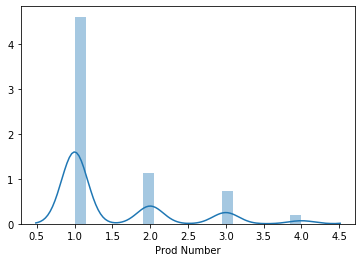

In [24]:
# Exited Customers Data: Distribution of No of Products
sns.distplot(ExitedCustomer['Prod Number'])
ExitedCustomer['Prod Number'].value_counts()

1    1423
0     613
Name: HasCrCard, dtype: int64

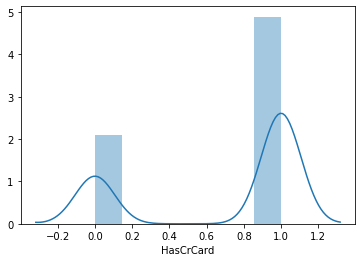

In [25]:
# Exited Customers Data: Distribution of Have or No Credit Card
sns.distplot(ExitedCustomer['HasCrCard'])
ExitedCustomer.HasCrCard.value_counts()

1     232
9     213
3     213
5     209
4     203
2     200
8     197
6     196
7     177
10    101
0      95
Name: Tenure, dtype: int64

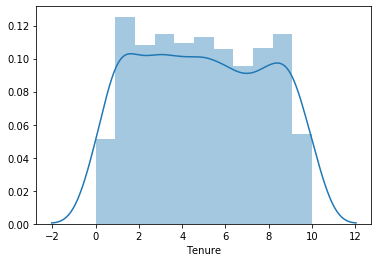

In [26]:
# Exited Customers Data: Distribution of Tenure
sns.distplot(ExitedCustomer.Tenure)
ExitedCustomer.Tenure.value_counts()

count    2036.000000
mean       44.838900
std         9.763875
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

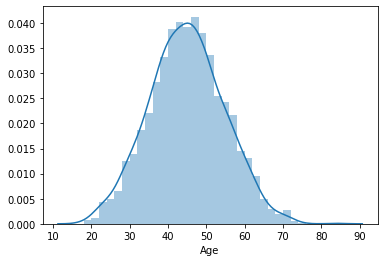

In [27]:
# Exited Customers Data: Distribution of Age Group
sns.distplot(ExitedCustomer.Age)
ExitedCustomer.Age.value_counts()
ExitedCustomer.Age.describe()

0    1302
1     734
Name: ActMem, dtype: int64

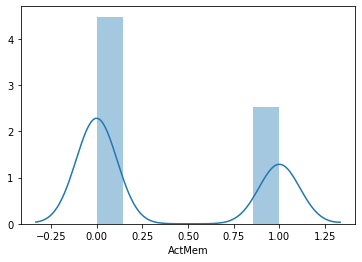

In [28]:
# Exited Customers Data: Distribution of Active or Inactive Status
sns.distplot(ExitedCustomer.ActMem)
ExitedCustomer.ActMem.value_counts()

count      2036.000000
mean      91081.655604
std       58362.514837
min           0.000000
25%       37896.755000
50%      109344.230000
75%      131404.252500
max      250898.090000
Name: Balance, dtype: float64

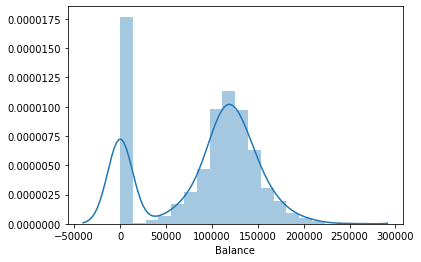

In [29]:
# Exited Customers Data: Distribution of Account Balance
sns.distplot(ExitedCustomer.Balance)
ExitedCustomer.Balance.value_counts()
ExitedCustomer.Balance.describe()

count      2036.000000
mean     101418.066189
std       57886.755199
min          11.580000
25%       51898.777500
50%      102431.875000
75%      152231.570000
max      199808.100000
Name: EstimatedSalary, dtype: float64

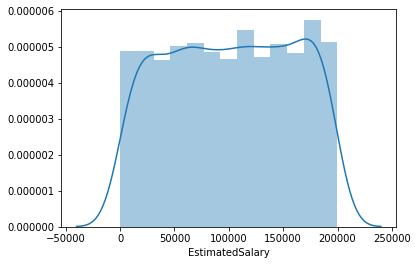

In [30]:
# Exited Customers Data: Distribution of Estimate Salary
sns.distplot(ExitedCustomer.EstimatedSalary)
ExitedCustomer.EstimatedSalary.value_counts()
ExitedCustomer.EstimatedSalary.describe()

count    2036.000000
mean      645.384086
std       100.335363
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: CredRate, dtype: float64

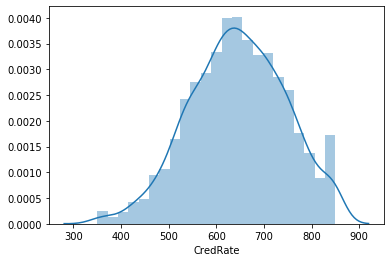

In [31]:
# Exited Customers Data: Distribution of Credit Rating
sns.distplot(ExitedCustomer.CredRate)
ExitedCustomer.CredRate.value_counts()
ExitedCustomer.CredRate.describe()

In [32]:
# Exited Customers Data: Mean of Account Balance
ExitedCustomer.groupby('Geography')['Balance'].mean()
#Final_data.groupby('Geography')['Balance'].mean()


Geography
France      71192.795728
Germany    120361.075590
Spain       72335.365874
Name: Balance, dtype: float64

In [33]:
# Exited Customers Data: Mean of Estimated Salary
ExitedCustomer.groupby('Geography')['EstimatedSalary'].mean()
#Final_data.groupby('Geography')['EstimatedSalary'].mean()


Geography
France     103439.278296
Germany     98403.886450
Spain      103399.523714
Name: EstimatedSalary, dtype: float64

In [34]:
# Exited Customers Data: Correlations between the columns
Final_data.corr()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
CustomerId,1.000000,0.005613,0.009775,-0.014381,-0.012474,0.017275,-0.014236,0.001757,0.014691,-0.006529
CredRate,0.005613,1.000000,-0.004536,0.000714,0.006645,0.011900,-0.005680,0.025413,-0.001015,-0.026944
Age,0.009775,-0.004536,1.000000,-0.009903,0.028254,-0.030788,-0.012029,0.084981,-0.007224,0.285201
Tenure,-0.014381,0.000714,-0.009903,1.000000,-0.012334,0.013266,0.022865,-0.028376,0.007876,-0.013784
Balance,-0.012474,0.006645,0.028254,-0.012334,1.000000,-0.304127,-0.014622,-0.010100,0.012920,0.118299
Prod Number,0.017275,0.011900,-0.030788,0.013266,-0.304127,1.000000,0.003109,0.009437,0.014412,-0.047710
HasCrCard,-0.014236,-0.005680,-0.012029,0.022865,-0.014622,0.003109,1.000000,-0.012089,-0.010117,-0.007281
ActMem,0.001757,0.025413,0.084981,-0.028376,-0.010100,0.009437,-0.012089,1.000000,-0.011501,-0.156443
EstimatedSalary,0.014691,-0.001015,-0.007224,0.007876,0.012920,0.014412,-0.010117,-0.011501,1.000000,0.011819
Exited,-0.006529,-0.026944,0.285201,-0.013784,0.118299,-0.047710,-0.007281,-0.156443,0.011819,1.000000


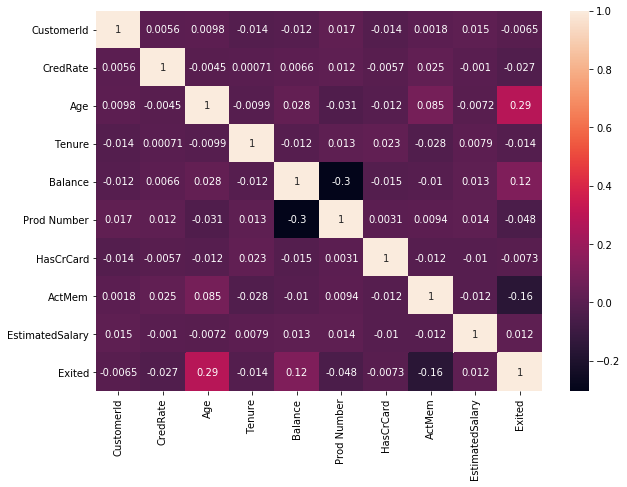

In [35]:
# Exited Customers Data: Plot Correlations between the columns
plt.figure(figsize = (10, 7))
sns.heatmap(Final_data.corr() , annot= True)

In [36]:
# Replace string and organize the values of the columns

credrate_conditions = [
    (Final_data['CredRate'] < 630),
    (Final_data['CredRate'] >= 630) & (Final_data['CredRate'] < 690),
    (Final_data['CredRate'] >= 690) & (Final_data['CredRate'] < 720),
    (Final_data['CredRate'] >= 720)
    ]

age_conditions = [
    (Final_data['Age'] <= 25),
    (Final_data['Age'] >= 26) & (Final_data['Age'] <= 40),
    (Final_data['Age'] >= 41) & (Final_data['Age'] <= 55),
    (Final_data['Age'] >= 56) & (Final_data['Age'] <= 70),
    (Final_data['Age'] >= 71)
    ]

balance_conditions = [
    (Final_data['Balance'] <50000),
    (Final_data['Balance'] >= 50000) & (Final_data['Balance'] < 100000),
    (Final_data['Balance'] >= 100000) & (Final_data['Balance'] < 150000),
    (Final_data['Balance'] >= 150000) & (Final_data['Balance'] < 200000),
    (Final_data['Balance'] >= 200000) & (Final_data['Balance'] < 250000),
    (Final_data['Balance'] >= 250000)
    ]

estimatedsalary_conditions = [
    (Final_data['EstimatedSalary'] <50000),
    (Final_data['EstimatedSalary'] >= 50000) & (Final_data['EstimatedSalary'] < 100000),
    (Final_data['EstimatedSalary'] >= 100000) & (Final_data['EstimatedSalary'] < 150000),
    (Final_data['EstimatedSalary'] >= 150000) & (Final_data['EstimatedSalary'] < 200000),
    (Final_data['EstimatedSalary'] >= 200000)
    ]

# create a list of the values we want to assign for each condition
credrate_values = ['1', '2', '3', '4']
age_values = ['1', '2', '3', '4', '5']
balance_values = ['1', '2', '3', '4', '5', '6']
estimatedsalary_values = ['1', '2', '3', '4', '5']

# create a new column and use np.select to assign values to it using our lists as arguments
Final_data['CredRate'] = np.select(credrate_conditions, credrate_values)
Final_data['Age'] = np.select(age_conditions, age_values)
Final_data['Balance'] = np.select(balance_conditions, balance_values)
Final_data['EstimatedSalary'] = np.select(estimatedsalary_conditions, estimatedsalary_values)

# display updated DataFrame
Final_data.head()

C:\Users\antho\anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\antho\anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\antho\anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,1,France,Female,3,2,1,1,1,1,3,1
1,15647311,1,Spain,Female,3,1,2,1,0,1,3,0
2,15619304,1,France,Female,3,8,4,3,1,0,3,1
3,15701354,3,France,Female,2,1,1,2,0,0,2,0
4,15737888,4,Spain,Female,3,2,3,1,1,1,2,0


In [37]:
c = Final_data[Final_data.Exited == 1]
c

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,1,France,Female,3,2,1,1,1,1,3,1
2,15619304,1,France,Female,3,8,4,3,1,0,3,1
5,15574012,2,Spain,Male,3,8,3,2,1,0,3,1
7,15656148,1,Germany,Female,2,4,3,4,1,0,3,1
16,15737452,2,Germany,Male,4,1,3,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,1,Germany,Male,3,3,4,1,1,1,2,1
9982,15768163,2,Germany,Female,3,7,3,1,1,0,3,1
9991,15769959,1,France,Female,3,4,2,1,1,0,2,1
9997,15584532,3,France,Female,2,7,1,1,0,1,1,1


In [38]:
# Exited Customers Data: Have or no credit card
c['HasCrCard'].value_counts()

1    1423
0     613
Name: HasCrCard, dtype: int64

In [39]:

#data[data.CustomerId == 15646720]

## Encoding CredRate Column

In [40]:
Final_data.CredRate = Final_data.CredRate.astype('object')

C:\Users\antho\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [41]:
Label_encod = LabelEncoder()

In [42]:
Final_data.CredRate = Label_encod.fit_transform(Final_data.CredRate)

In [43]:
Final_data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,0,France,Female,3,2,1,1,1,1,3,1
1,15647311,0,Spain,Female,3,1,2,1,0,1,3,0
2,15619304,0,France,Female,3,8,4,3,1,0,3,1
3,15701354,2,France,Female,2,1,1,2,0,0,2,0
4,15737888,3,Spain,Female,3,2,3,1,1,1,2,0


## Encoding Geography Column

In [44]:
Final_data.Geography = Final_data.Geography.astype('object')

C:\Users\antho\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [45]:
Label_encod = LabelEncoder()

In [46]:
Final_data.Geography = Label_encod.fit_transform(Final_data.Geography)

In [47]:
Final_data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,0,0,Female,3,2,1,1,1,1,3,1
1,15647311,0,2,Female,3,1,2,1,0,1,3,0
2,15619304,0,0,Female,3,8,4,3,1,0,3,1
3,15701354,2,0,Female,2,1,1,2,0,0,2,0
4,15737888,3,2,Female,3,2,3,1,1,1,2,0


## Encoding Gender Column

In [48]:
Final_data.Gender = Final_data.Gender.astype('object')

C:\Users\antho\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [49]:
Label_encod = LabelEncoder()

In [50]:
Final_data.Gender = Label_encod.fit_transform(Final_data.Gender)

In [51]:
Final_data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,0,0,0,3,2,1,1,1,1,3,1
1,15647311,0,2,0,3,1,2,1,0,1,3,0
2,15619304,0,0,0,3,8,4,3,1,0,3,1
3,15701354,2,0,0,2,1,1,2,0,0,2,0
4,15737888,3,2,0,3,2,3,1,1,1,2,0


## Encoding Age Column

In [52]:
Final_data.Age = Final_data.Age.astype('object')

C:\Users\antho\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
Label_encod = LabelEncoder()

In [54]:
Final_data.Age = Label_encod.fit_transform(Final_data.Age)

In [55]:
Final_data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,0,0,0,2,2,1,1,1,1,3,1
1,15647311,0,2,0,2,1,2,1,0,1,3,0
2,15619304,0,0,0,2,8,4,3,1,0,3,1
3,15701354,2,0,0,1,1,1,2,0,0,2,0
4,15737888,3,2,0,2,2,3,1,1,1,2,0


## Encoding Balance Column

In [56]:
Final_data.Balance = Final_data.Balance.astype('object')

C:\Users\antho\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [57]:
Label_encod = LabelEncoder()

In [58]:
Final_data.Balance = Label_encod.fit_transform(Final_data.Balance)

In [59]:
Final_data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,0,0,0,2,2,0,1,1,1,3,1
1,15647311,0,2,0,2,1,1,1,0,1,3,0
2,15619304,0,0,0,2,8,3,3,1,0,3,1
3,15701354,2,0,0,1,1,0,2,0,0,2,0
4,15737888,3,2,0,2,2,2,1,1,1,2,0


## Encoding EstimatedSalary Column

In [60]:
Final_data.EstimatedSalary = Final_data.EstimatedSalary.astype('object')

C:\Users\antho\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [61]:
Label_encod = LabelEncoder()

In [62]:
Final_data.EstimatedSalary = Label_encod.fit_transform(Final_data.EstimatedSalary)

In [63]:
Final_data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,0,0,0,2,2,0,1,1,1,2,1
1,15647311,0,2,0,2,1,1,1,0,1,2,0
2,15619304,0,0,0,2,8,3,3,1,0,2,1
3,15701354,2,0,0,1,1,0,2,0,0,1,0
4,15737888,3,2,0,2,2,2,1,1,1,1,0


In [64]:
# Check info of final data
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   CustomerId       9996 non-null   int64
 1   CredRate         9996 non-null   int32
 2   Geography        9996 non-null   int32
 3   Gender           9996 non-null   int32
 4   Age              9996 non-null   int32
 5   Tenure           9996 non-null   int64
 6   Balance          9996 non-null   int32
 7   Prod Number      9996 non-null   int64
 8   HasCrCard        9996 non-null   int64
 9   ActMem           9996 non-null   int64
 10  EstimatedSalary  9996 non-null   int32
 11  Exited           9996 non-null   int64
dtypes: int32(6), int64(6)
memory usage: 780.9 KB


## Encoding to transform categorical features to numerical features (binary)

In [65]:
# Set target
target = np.array(Final_data['Exited'])

In [66]:
target

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [67]:
# Set features for prediction
features = np.array(Final_data.drop(['CustomerId', 'Exited'] ,  axis=1))

In [68]:
features

array([[0, 0, 0, ..., 1, 1, 2],
       [0, 2, 0, ..., 0, 1, 2],
       [0, 0, 0, ..., 1, 0, 2],
       ...,
       [2, 0, 0, ..., 0, 1, 0],
       [3, 1, 1, ..., 1, 0, 1],
       [3, 0, 0, ..., 1, 0, 0]], dtype=int64)

## Train_Test_Split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.3, random_state = 123)

## KNN Model

In [70]:
le = preprocessing.LabelEncoder()

In [71]:
CredRate = le.fit_transform(list(Final_data['CredRate']))
Geography = le.fit_transform(list(Final_data['Geography']))
Gender = le.fit_transform(list(Final_data['Gender']))
Age = le.fit_transform(list(Final_data['Age']))
Tenure = le.fit_transform(list(Final_data['Tenure']))
Balance = le.fit_transform(list(Final_data['Balance']))
ProdNum = le.fit_transform(list(Final_data['Prod Number']))
HasCrCard = le.fit_transform(list(Final_data['HasCrCard']))
ActMem = le.fit_transform(list(Final_data['ActMem']))
EstimatedSalary = le.fit_transform(list(Final_data['EstimatedSalary']))
Exited = le.fit_transform(list(Final_data['Exited']))

In [72]:
predict = 'Exited'

In [73]:
x = list(zip(CredRate, Geography, Gender, Age, Tenure, Balance, ProdNum, HasCrCard, ActMem, EstimatedSalary)) 
y = list(Exited)

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [75]:
len(X_test)

2999

In [76]:
model = KNeighborsClassifier(n_neighbors= 5)

In [77]:
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
#print accuracy score for KNN model
acc = model.score(X_test, Y_test)
print(acc)

0.8086028676225409


In [79]:
# Predicted data vs actual data
predicted = model.predict(X_test)
predict_customer = ['Stay', 'Exited']

for x in range (len(predicted)):
    print('Predicted :', predict_customer[predicted[x]], 'Data :', X_test[x], 'Actual :', predict_customer[Y_test[x]])
    n = model.kneighbors([X_test[x]], 5, True)
    print('N :', n)

Predicted : Stay Data : (3, 0, 1, 1, 5, 3, 0, 1, 1, 0) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[ 481, 6370, 1606, 2168, 1765]], dtype=int64))
Predicted : Stay Data : (0, 2, 0, 2, 4, 0, 1, 1, 1, 1) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[2633, 1026, 1032, 6402, 6101]], dtype=int64))
Predicted : Stay Data : (1, 1, 1, 0, 3, 1, 0, 1, 0, 3) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.73205081]]), array([[2895, 4063, 2350,  299, 6024]], dtype=int64))
Predicted : Stay Data : (1, 0, 1, 1, 7, 3, 0, 1, 0, 0) Actual : Exited
N : (array([[0., 1., 1., 1., 1.]]), array([[5197, 3187, 6456, 6173, 5964]], dtype=int64))
Predicted : Stay Data : (3, 1, 1, 1, 7, 2, 0, 1, 1, 2) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[2729, 6169, 6150,  394, 2962]], dtype=int64))
Predicted : Exited Data : (0, 0, 0, 1, 9, 2, 0, 1, 1, 3) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[  86, 67

Predicted : Stay Data : (0, 1, 1, 1, 6, 1, 0, 1, 0, 2) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[4278, 1405, 3775, 3619,  420]], dtype=int64))
Predicted : Stay Data : (3, 0, 0, 2, 2, 1, 0, 1, 1, 1) Actual : Stay
N : (array([[0.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[5307, 2586, 4109, 5220, 1046]], dtype=int64))
Predicted : Stay Data : (3, 1, 1, 1, 9, 3, 1, 1, 0, 3) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.73205081, 1.73205081]]), array([[5445,  848,   87, 3701, 6205]], dtype=int64))
Predicted : Stay Data : (2, 1, 1, 2, 8, 1, 0, 1, 1, 3) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.73205081, 1.73205081]]), array([[ 841, 6409, 4996, 6989,  118]], dtype=int64))
Predicted : Stay Data : (0, 1, 0, 1, 7, 2, 1, 1, 0, 0) Actual : Stay
N : (array([[0., 1., 1., 1., 1.]]), array([[5176, 5502, 2959, 6212,  421]], dtype=int64))
Predicted : Stay Data : (2, 0, 0, 2, 7, 1, 1,

N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[3945, 3172, 4939, 3494, 4211]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 5, 0, 1, 1, 1, 2) Actual : Stay
N : (array([[0., 0., 0., 0., 1.]]), array([[4724, 4426, 6015, 2679, 3207]], dtype=int64))
Predicted : Stay Data : (1, 1, 0, 1, 3, 3, 1, 1, 0, 0) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[3925, 2110, 4925,  604,  455]], dtype=int64))
Predicted : Stay Data : (1, 0, 0, 2, 4, 2, 0, 0, 0, 2) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[4823, 5520, 4267,  627, 5594]], dtype=int64))
Predicted : Stay Data : (0, 2, 1, 1, 7, 2, 0, 0, 0, 3) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[1085, 4976, 6924, 5368, 4937]], dtype=int64))
Predicted : Stay Data : (1, 0, 0, 3, 5, 0, 1, 1, 1, 3) Actual : Stay
N : (array([[1.        , 1.41421356, 1.414213

N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.73205081]]), array([[3569,  785, 1821, 1797, 3660]], dtype=int64))
Predicted : Stay Data : (1, 2, 0, 1, 1, 1, 1, 1, 0, 1) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[1014, 4120, 1416, 1673, 2259]], dtype=int64))
Predicted : Stay Data : (0, 1, 1, 2, 3, 2, 1, 0, 1, 1) Actual : Stay
N : (array([[0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[6711, 1956, 2351, 5546,  815]], dtype=int64))
Predicted : Stay Data : (0, 2, 1, 1, 5, 2, 0, 1, 0, 1) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[4608, 6845, 4697, 2249, 5383]], dtype=int64))
Predicted : Stay Data : (1, 1, 1, 1, 9, 2, 1, 0, 1, 3) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[3163, 1127, 6231,  184, 5768]], dtype=int64))
Predicted : Stay Data : (1, 0, 1, 1, 7, 2, 0, 0, 0, 3) Actual : Stay
N : (array([[1.        , 1.        , 1.      

N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[6376, 3245, 2366, 6799,  209]], dtype=int64))
Predicted : Stay Data : (0, 2, 0, 2, 4, 0, 1, 1, 1, 0) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[6478, 4076, 6239, 4163, 4200]], dtype=int64))
Predicted : Stay Data : (1, 2, 1, 1, 3, 1, 0, 1, 1, 0) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[4747, 1649, 5095, 4981, 3659]], dtype=int64))
Predicted : Stay Data : (3, 0, 0, 1, 3, 0, 1, 1, 0, 1) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[2123, 6614, 3547, 2441, 6587]], dtype=int64))
Predicted : Stay Data : (3, 0, 1, 2, 9, 0, 0, 0, 1, 1) Actual : Exited
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.73205081]]), array([[ 984, 1186, 2984, 1583, 1644]], dtype=int64))
Predicted : Stay Data : (0, 1, 1, 2, 9, 3, 1, 0, 0, 3) Actual : Stay
N :

Predicted : Stay Data : (0, 0, 1, 3, 5, 1, 1, 1, 1, 2) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[1670, 2096, 3179, 4857, 6862]], dtype=int64))
Predicted : Stay Data : (0, 2, 1, 1, 2, 3, 0, 1, 1, 0) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[6487, 5592,  680,  318, 5689]], dtype=int64))
Predicted : Exited Data : (0, 1, 0, 2, 1, 2, 0, 1, 0, 1) Actual : Exited
N : (array([[1., 1., 1., 1., 1.]]), array([[ 974, 6007, 1414, 3530, 5797]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 6, 0, 1, 0, 0, 3) Actual : Stay
N : (array([[0., 0., 0., 1., 1.]]), array([[ 740, 1966, 6608,  276, 5981]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 2, 9, 0, 1, 1, 1, 1) Actual : Stay
N : (array([[0., 0., 0., 1., 1.]]), array([[1567, 6294,  818, 4137, 1281]], dtype=int64))
Predicted : Stay Data : (1, 0, 1, 0, 1, 1, 0, 0, 0, 1) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.73205081, 1.7

N : (array([[1.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[2994, 2096, 3406, 6621, 2205]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 2, 6, 2, 0, 1, 0, 0) Actual : Stay
N : (array([[0.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[3332, 6088, 1681, 3877, 6568]], dtype=int64))
Predicted : Stay Data : (3, 0, 1, 2, 5, 0, 0, 0, 1, 2) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[ 486, 5028, 3334, 3928, 2121]], dtype=int64))
Predicted : Exited Data : (3, 2, 1, 2, 2, 0, 0, 1, 0, 0) Actual : Exited
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[1667,   29, 6201, 5702, 1447]], dtype=int64))
Predicted : Stay Data : (0, 1, 0, 1, 4, 2, 0, 1, 1, 1) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[1422,  505,  587, 3231,  936]], dtype=int64))
Predicted : Stay Data : (2, 0, 1, 1, 7, 3, 0, 0, 0, 3) Actual : Stay
N

N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[1974, 2828, 1547, 6391, 6713]], dtype=int64))
Predicted : Stay Data : (1, 0, 0, 1, 5, 0, 1, 0, 1, 3) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[4903, 6708, 3503, 3448, 6415]], dtype=int64))
Predicted : Stay Data : (0, 1, 1, 3, 1, 2, 0, 0, 1, 1) Actual : Exited
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[2129, 5280, 5490, 1612, 4722]], dtype=int64))
Predicted : Stay Data : (1, 1, 1, 1, 2, 2, 0, 1, 1, 1) Actual : Stay
N : (array([[0.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[6335, 2054, 1432, 6905, 2128]], dtype=int64))
Predicted : Stay Data : (1, 0, 0, 2, 6, 2, 1, 1, 1, 1) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[3844, 3313, 6122,  571, 5142]], dtype=int64))
Predicted : Stay Data : (0, 1, 1, 2, 4, 1, 1, 1, 1, 1) Actual : Stay
N :

Predicted : Stay Data : (2, 0, 1, 1, 9, 2, 0, 1, 0, 3) Actual : Stay
N : (array([[0.        , 0.        , 1.        , 1.        , 1.41421356]]), array([[ 591, 5098, 6724, 4104,  666]], dtype=int64))
Predicted : Stay Data : (2, 2, 0, 1, 10, 2, 1, 1, 1, 0) Actual : Stay
N : (array([[1.41421356, 1.73205081, 1.73205081, 1.73205081, 1.73205081]]), array([[3319, 5744, 5634, 2688, 5358]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 4, 3, 1, 1, 1, 3) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[5847,  671, 4115, 6187, 1257]], dtype=int64))
Predicted : Stay Data : (0, 1, 1, 1, 7, 1, 1, 1, 1, 3) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[2803, 1991, 5458,  582, 2628]], dtype=int64))
Predicted : Stay Data : (3, 1, 0, 1, 2, 2, 1, 0, 0, 0) Actual : Exited
N : (array([[1.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[2244, 1189, 6725, 2321, 1757]], dtype=int64))
Pr

N : (array([[1.41421356, 1.73205081, 1.73205081, 1.73205081, 1.73205081]]), array([[4158, 4922, 4657, 6864,  874]], dtype=int64))
Predicted : Stay Data : (0, 2, 0, 2, 4, 1, 1, 1, 0, 2) Actual : Exited
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[ 794, 2633, 1980, 6101, 1328]], dtype=int64))
Predicted : Stay Data : (0, 2, 0, 2, 4, 2, 1, 1, 1, 0) Actual : Exited
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[6771, 4719,  159,  113,  114]], dtype=int64))
Predicted : Stay Data : (0, 2, 0, 2, 9, 0, 0, 1, 0, 2) Actual : Exited
N : (array([[0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[3660, 6490, 5820,  938, 5060]], dtype=int64))
Predicted : Stay Data : (0, 2, 1, 1, 4, 0, 1, 1, 1, 3) Actual : Stay
N : (array([[0.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[6878, 6746, 5900, 6737, 3711]], dtype=int64))
Predicted : Stay Data : (0, 0, 0, 0, 7, 2, 0, 1, 1, 0) Actual : Stay

Predicted : Stay Data : (0, 0, 0, 2, 1, 0, 1, 0, 1, 1) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[6748, 5442, 4570, 2498, 5370]], dtype=int64))
Predicted : Stay Data : (3, 0, 0, 1, 4, 0, 0, 1, 0, 0) Actual : Exited
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[2264, 5054, 3830, 3547, 3246]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 1, 0, 0, 1, 1, 2) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[5397, 5563, 2148, 6299, 4044]], dtype=int64))
Predicted : Stay Data : (1, 0, 0, 1, 7, 0, 0, 1, 0, 2) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[1501, 6354, 3327, 1339, 3768]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 2, 3, 2, 0, 0, 1, 1) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[3479, 3835, 3382, 6711,  635]], dtype=int64))
Predicted : Stay Data : (1, 2, 0, 3, 9, 0, 

Predicted : Stay Data : (3, 1, 0, 1, 3, 2, 1, 1, 1, 0) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[3412, 1237, 1744, 1079, 3557]], dtype=int64))
Predicted : Exited Data : (1, 0, 1, 1, 4, 0, 0, 1, 0, 1) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[6079, 4175, 2124, 6453,  881]], dtype=int64))
Predicted : Stay Data : (0, 2, 1, 1, 5, 3, 1, 0, 0, 2) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.73205081, 1.73205081]]), array([[4984, 2678, 6117,  275, 3175]], dtype=int64))
Predicted : Stay Data : (2, 2, 0, 0, 6, 2, 0, 0, 1, 1) Actual : Stay
N : (array([[1.73205081, 1.73205081, 1.73205081, 1.73205081, 1.73205081]]), array([[ 598,  273, 2606, 6446, 6353]], dtype=int64))
Predicted : Stay Data : (3, 1, 1, 1, 4, 2, 0, 1, 1, 2) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[2621, 3349, 2553, 6048, 1224]], dtype=int64))
Predicted : Stay Data : (1, 2, 0, 0, 1, 0, 

N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[5084, 2868,  400, 6634, 3776]], dtype=int64))
Predicted : Stay Data : (0, 1, 0, 4, 6, 2, 0, 1, 1, 3) Actual : Exited
N : (array([[1.        , 1.41421356, 1.41421356, 1.73205081, 1.73205081]]), array([[4735,  854,  575, 3669, 5945]], dtype=int64))
Predicted : Stay Data : (3, 0, 0, 1, 8, 0, 1, 1, 1, 1) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[1609, 1175, 1421,  620,  170]], dtype=int64))
Predicted : Stay Data : (3, 0, 1, 1, 3, 0, 0, 0, 0, 1) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[4487, 2123, 1163,  548,  970]], dtype=int64))
Predicted : Stay Data : (1, 0, 1, 1, 9, 2, 0, 1, 0, 0) Actual : Stay
N : (array([[0., 1., 1., 1., 1.]]), array([[5164, 3215, 6595, 4835, 2404]], dtype=int64))
Predicted : Stay Data : (1, 1, 1, 3, 0, 2, 1, 1, 1, 3) Actual : Stay
N : (array([[1.41421356, 1.73205081, 1.73205081, 1.73205081, 1.73205081]]), array([

N : (array([[1.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[3504, 4464, 6994, 2337, 4481]], dtype=int64))
Predicted : Stay Data : (2, 0, 0, 1, 3, 0, 0, 0, 1, 2) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[3918, 1066, 3245, 3791, 6301]], dtype=int64))
Predicted : Stay Data : (3, 0, 1, 1, 3, 1, 0, 0, 0, 0) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[3517, 6583, 1458, 3605, 2293]], dtype=int64))
Predicted : Stay Data : (0, 2, 1, 1, 9, 2, 0, 1, 1, 3) Actual : Stay
N : (array([[0., 1., 1., 1., 1.]]), array([[1054, 5437, 4059, 3514, 1138]], dtype=int64))
Predicted : Stay Data : (3, 0, 1, 1, 5, 0, 1, 1, 0, 1) Actual : Stay
N : (array([[0.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[3771,  503, 2969, 6210, 3246]], dtype=int64))
Predicted : Stay Data : (2, 2, 0, 1, 5, 0, 1, 0, 0, 2) Actual : Stay
N : (array([[1.        , 1.        , 1.414213

Predicted : Stay Data : (0, 2, 0, 1, 4, 0, 1, 1, 0, 0) Actual : Stay
N : (array([[0.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[4163, 1380, 4791, 3735, 1584]], dtype=int64))
Predicted : Stay Data : (1, 1, 1, 1, 3, 2, 0, 0, 1, 1) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[6494, 6327, 6204, 4894, 1312]], dtype=int64))
Predicted : Stay Data : (1, 1, 1, 1, 2, 0, 1, 0, 1, 1) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[2477, 4528, 6730,  287, 3120]], dtype=int64))
Predicted : Stay Data : (1, 2, 0, 2, 3, 1, 0, 0, 1, 0) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.73205081, 1.73205081, 1.73205081]]), array([[4966, 6954,  453, 1453, 3132]], dtype=int64))
Predicted : Stay Data : (1, 0, 0, 2, 8, 0, 0, 1, 0, 0) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[6803, 1730, 6454, 4293,   80]], dtype=int64))
Predi

N : (array([[0., 0., 0., 1., 1.]]), array([[3275, 4238, 6823,   28, 2652]], dtype=int64))
Predicted : Stay Data : (0, 1, 0, 1, 6, 1, 1, 1, 1, 1) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[4784, 3048, 1060, 6750, 6027]], dtype=int64))
Predicted : Stay Data : (0, 0, 0, 3, 2, 2, 0, 1, 1, 0) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[5317, 1819, 5349, 3871, 2419]], dtype=int64))
Predicted : Stay Data : (1, 0, 0, 1, 2, 0, 1, 1, 0, 1) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[ 803, 1087, 3766, 3938, 2086]], dtype=int64))
Predicted : Stay Data : (0, 0, 0, 1, 6, 2, 0, 0, 0, 3) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[1067, 3016, 3970, 1919, 3278]], dtype=int64))
Predicted : Stay Data : (1, 0, 0, 2, 7, 0, 1, 0, 1, 0) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[3

N : (array([[0., 1., 1., 1., 1.]]), array([[5493, 2404, 5798, 6595,  870]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 2, 4, 1, 0, 0, 0, 0) Actual : Exited
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.73205081]]), array([[6616, 6882, 1345, 4645, 5025]], dtype=int64))
Predicted : Stay Data : (3, 0, 0, 1, 4, 2, 1, 1, 1, 0) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[3557,  409, 3412, 4800,  832]], dtype=int64))
Predicted : Stay Data : (3, 1, 1, 1, 5, 2, 0, 1, 0, 1) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[ 528, 1654, 1444, 6048, 1833]], dtype=int64))
Predicted : Stay Data : (3, 0, 1, 1, 9, 2, 0, 1, 1, 2) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[4706, 6915, 3950, 5704, 2275]], dtype=int64))
Predicted : Stay Data : (3, 1, 1, 1, 7, 1, 0, 1, 0, 2) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[5761, 3236, 5967, 5284, 1518]], dtype=i

Predicted : Stay Data : (0, 0, 1, 1, 7, 0, 1, 1, 1, 1) Actual : Stay
N : (array([[0., 0., 0., 1., 1.]]), array([[3275, 4238, 6823,   28, 2652]], dtype=int64))
Predicted : Exited Data : (1, 1, 0, 2, 9, 1, 0, 1, 0, 3) Actual : Stay
N : (array([[0.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[6777, 5845, 2316, 2993, 3242]], dtype=int64))
Predicted : Stay Data : (0, 2, 0, 2, 4, 1, 0, 1, 0, 2) Actual : Exited
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[1731, 5040, 6747, 5923,  794]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 2, 8, 1, 0, 0, 1, 0) Actual : Exited
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[  47, 1976, 5443, 5793, 4521]], dtype=int64))
Predicted : Stay Data : (2, 0, 1, 2, 9, 1, 0, 1, 1, 3) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.73205081, 1.73205081]]), array([[4754, 6409, 6779, 1660,  118]], dtype=int64))
Predicted : Stay Data : (1, 2, 1, 1, 7,

Predicted : Stay Data : (0, 2, 1, 1, 5, 0, 1, 1, 1, 3) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[6878, 6481, 2255,   66, 3617]], dtype=int64))
Predicted : Stay Data : (3, 0, 0, 1, 6, 0, 0, 0, 0, 0) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[4852, 2960, 4957, 1599, 1914]], dtype=int64))
Predicted : Stay Data : (2, 0, 0, 1, 5, 3, 0, 1, 1, 1) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.73205081]]), array([[1765,  419, 3226, 6363, 6360]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 6, 2, 0, 0, 0, 1) Actual : Exited
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[4074, 6336, 1249, 4806, 1569]], dtype=int64))
Predicted : Stay Data : (3, 0, 1, 1, 4, 0, 1, 1, 1, 0) Actual : Stay
N : (array([[0., 0., 1., 1., 1.]]), array([[5222, 2436, 3703, 1847, 3246]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 2, 7, 0, 1, 0, 1, 1) Actual : Stay
N : (array([[1

Predicted : Stay Data : (0, 0, 0, 2, 9, 3, 1, 0, 0, 2) Actual : Exited
N : (array([[1.        , 1.41421356, 1.41421356, 1.73205081, 1.73205081]]), array([[4816, 1254, 5183, 2587, 3570]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 10, 2, 0, 1, 1, 3) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[2069, 2642, 6358, 6362, 6334]], dtype=int64))
Predicted : Stay Data : (1, 0, 1, 2, 9, 0, 0, 1, 0, 3) Actual : Exited
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[4008, 6254, 6121,  296, 4613]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 7, 0, 0, 0, 0, 2) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[6926, 5430, 3430, 6467, 1501]], dtype=int64))
Predicted : Exited Data : (0, 1, 0, 1, 6, 2, 1, 0, 0, 2) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[2956, 5112, 6877, 1983, 1282]], dtype=int64)

N : (array([[0., 0., 1., 1., 1.]]), array([[4523, 1299, 3681, 5672, 2517]], dtype=int64))
Predicted : Stay Data : (2, 0, 0, 2, 7, 0, 1, 1, 1, 2) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[4771, 1193, 2996, 3351,  497]], dtype=int64))
Predicted : Exited Data : (3, 0, 1, 2, 3, 2, 0, 1, 1, 0) Actual : Exited
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[  84, 6673, 6370, 1816,  808]], dtype=int64))
Predicted : Stay Data : (1, 1, 1, 1, 5, 2, 0, 1, 0, 0) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[4936,   90, 2089,  731, 4556]], dtype=int64))
Predicted : Stay Data : (3, 2, 1, 3, 1, 0, 0, 1, 1, 3) Actual : Stay
N : (array([[1.41421356, 1.73205081, 1.73205081, 1.73205081, 1.73205081]]), array([[5972, 2178, 2412, 2622, 5143]], dtype=int64))
Predicted : Stay Data : (3, 0, 0, 1, 6, 2, 0, 1, 1, 0) Actual : Stay
N : (array([[0., 1., 1., 1., 1.]]), array([[5528, 4516, 3762, 3673, 5630]], dtype

Predicted : Stay Data : (1, 0, 1, 2, 5, 0, 0, 0, 1, 1) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[ 250,    4,  524, 1406, 5025]], dtype=int64))
Predicted : Stay Data : (1, 1, 1, 1, 7, 1, 0, 1, 0, 3) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[4496, 4949, 6144, 2101, 4761]], dtype=int64))
Predicted : Stay Data : (1, 1, 0, 2, 9, 2, 1, 0, 1, 0) Actual : Exited
N : (array([[1.        , 1.41421356, 1.73205081, 1.73205081, 1.73205081]]), array([[3347, 4812, 6822, 6259, 1841]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 5, 0, 0, 0, 0, 0) Actual : Stay
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[4654, 1378, 3288,   78, 3635]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 4, 0, 1, 1, 0, 1) Actual : Stay
N : (array([[0., 1., 1., 1., 1.]]), array([[ 881, 2958, 1860, 2195, 1419]], dtype=int64))
Predicted : Stay Data : (3, 0, 1, 1, 8, 0, 

N : (array([[0., 1., 1., 1., 1.]]), array([[3428, 1553, 6377, 1504, 6366]], dtype=int64))
Predicted : Stay Data : (0, 0, 0, 1, 4, 2, 0, 1, 0, 1) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[ 758, 2543, 5380, 2090, 5308]], dtype=int64))
Predicted : Stay Data : (0, 0, 0, 1, 8, 0, 0, 0, 1, 1) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[2885, 1076, 3340, 5348, 4433]], dtype=int64))
Predicted : Stay Data : (3, 0, 1, 1, 0, 0, 0, 1, 0, 1) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[4449, 5229,  719, 3454, 1631]], dtype=int64))
Predicted : Stay Data : (3, 2, 0, 0, 5, 0, 1, 1, 1, 1) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[1978,  768, 4379, 3388,  436]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 1, 2, 0, 0, 1, 3) Actual : Stay
N : (array([[0., 1., 1., 1., 1.]]), array([[2204, 3588, 2049, 2639,  311]], dtype=int

N : (array([[0., 0., 1., 1., 1.]]), array([[2979,  399, 1244, 5971, 4092]], dtype=int64))
Predicted : Stay Data : (0, 0, 0, 2, 8, 0, 2, 0, 1, 2) Actual : Exited
N : (array([[1.41421356, 1.41421356, 1.73205081, 1.73205081, 1.73205081]]), array([[4853, 3340, 6287, 4486, 4336]], dtype=int64))
Predicted : Stay Data : (0, 0, 0, 2, 4, 2, 0, 0, 1, 2) Actual : Exited
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[4659,  627, 4823,  150, 2415]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 1, 0, 1, 1, 1, 1) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[6995, 6299, 5224, 4753, 4636]], dtype=int64))
Predicted : Stay Data : (1, 1, 1, 1, 9, 1, 0, 1, 1, 1) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[3202, 1443, 6163, 2538,  358]], dtype=int64))
Predicted : Stay Data : (0, 1, 0, 1, 4, 3, 0, 1, 0, 3) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array

Predicted : Stay Data : (0, 0, 0, 1, 6, 1, 1, 0, 0, 1) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[2956, 1983, 4004, 3167, 6037]], dtype=int64))
Predicted : Stay Data : (0, 1, 1, 3, 3, 2, 0, 1, 1, 1) Actual : Exited
N : (array([[1.        , 1.        , 1.        , 1.41421356, 1.41421356]]), array([[ 139, 4722, 5966, 2030, 4683]], dtype=int64))
Predicted : Stay Data : (0, 1, 1, 2, 5, 2, 1, 1, 0, 3) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[4370, 6337,  130, 3489, 2739]], dtype=int64))
Predicted : Stay Data : (0, 0, 0, 1, 3, 0, 1, 0, 1, 3) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[2661, 1513, 6584, 1494, 5575]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 10, 2, 0, 1, 1, 2) Actual : Stay
N : (array([[0.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[2069, 1921, 6362, 2689, 6358]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 9, 0,

Predicted : Stay Data : (3, 0, 0, 1, 2, 0, 0, 1, 0, 2) Actual : Exited
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[2117, 3102, 3715, 1066, 5415]], dtype=int64))
Predicted : Stay Data : (1, 1, 1, 2, 6, 2, 1, 1, 1, 0) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[ 472, 3656, 3457, 3013, 1248]], dtype=int64))
Predicted : Stay Data : (3, 0, 1, 1, 3, 3, 1, 1, 1, 3) Actual : Stay
N : (array([[1.        , 1.41421356, 1.41421356, 1.41421356, 1.41421356]]), array([[6788, 3971, 4221, 6703, 1880]], dtype=int64))
Predicted : Stay Data : (3, 1, 1, 1, 2, 1, 1, 1, 0, 2) Actual : Stay
N : (array([[1.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[5293, 6556, 3724, 4060, 4953]], dtype=int64))
Predicted : Stay Data : (3, 0, 1, 1, 3, 0, 1, 1, 0, 0) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[3547,   62, 6840, 2123, 3246]], dtype=int64))
Predicted : Exited Data : (0, 0, 0, 2, 3, 2

Predicted : Stay Data : (1, 0, 1, 0, 9, 2, 0, 0, 0, 3) Actual : Stay
N : (array([[1.41421356, 1.41421356, 1.41421356, 1.73205081, 1.73205081]]), array([[3798, 6724, 3353, 3526,  552]], dtype=int64))
Predicted : Exited Data : (0, 0, 1, 2, 8, 4, 0, 1, 0, 2) Actual : Exited
N : (array([[1.41421356, 1.41421356, 1.73205081, 1.73205081, 1.73205081]]), array([[5345, 1251,  718, 2246, 5373]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 1, 1, 1, 0, 1, 1, 0) Actual : Stay
N : (array([[0.        , 1.        , 1.        , 1.        , 1.41421356]]), array([[5306, 4312, 2029, 2861, 4753]], dtype=int64))
Predicted : Stay Data : (1, 0, 1, 1, 1, 2, 0, 1, 1, 1) Actual : Stay
N : (array([[1., 1., 1., 1., 1.]]), array([[1931, 2104, 1605, 3781, 6432]], dtype=int64))
Predicted : Stay Data : (0, 1, 1, 1, 5, 2, 1, 1, 1, 1) Actual : Stay
N : (array([[0.        , 1.        , 1.41421356, 1.41421356, 1.41421356]]), array([[ 774, 3248, 2083, 4926, 3651]], dtype=int64))
Predicted : Stay Data : (0, 0, 1, 3, 10, 

In [80]:
# Load Classification report for KNN model

class_report = metrics.classification_report(Y_test, predicted)

print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      2366
           1       0.60      0.28      0.38       633

    accuracy                           0.81      2999
   macro avg       0.72      0.61      0.63      2999
weighted avg       0.78      0.81      0.78      2999



Text(33.0, 0.5, 'Actual')

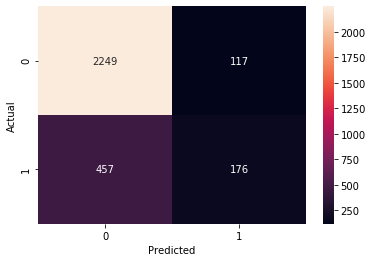

In [81]:
# Show confusion matrix for KNN model
cm = confusion_matrix(Y_test, predicted)
sns.heatmap(cm, annot= True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Support Vector Machine

In [131]:
clf = make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))

In [132]:
clf.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [133]:
y_pred = clf.predict(X_test)

In [134]:
svm_acc = metrics.accuracy_score(Y_test, y_pred)
print(svm_acc)

0.8406135378459486


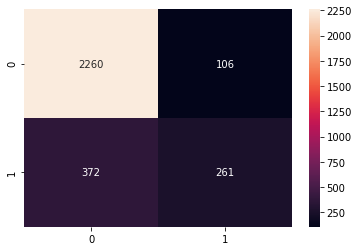

In [135]:
cmd = confusion_matrix(Y_test, y_pred)
sns.heatmap(cmd, annot= True, fmt="d")

In [136]:
svm_class_report = metrics.classification_report(Y_test, y_pred1)

print(svm_class_report)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2366
           1       0.67      0.44      0.53       633

    accuracy                           0.84      2999
   macro avg       0.77      0.69      0.72      2999
weighted avg       0.82      0.84      0.82      2999



## Random Forest

In [82]:
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 555) 
# n estimators = The number of trees in the forest.
# random state is important to set if you want to produce the same results, to ensure bootstrapping is same

classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=555,
                       verbose=0, warm_start=False)

In [83]:
# Predicting the Test set results

y_pred1 = classifier.predict(X_test)

In [84]:
#print accuracy score for random forest model before tuning

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(Y_test, y_pred1))

Accuracy: 0.8356118706235411


In [85]:
# Load classification report for random forest before tuning

class_report1 = metrics.classification_report(Y_test, y_pred1)

print(class_report1)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2366
           1       0.67      0.44      0.53       633

    accuracy                           0.84      2999
   macro avg       0.77      0.69      0.72      2999
weighted avg       0.82      0.84      0.82      2999



[[2228  138]
 [ 355  278]]


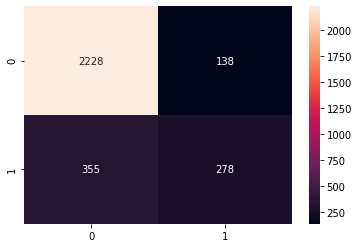

In [86]:
# Show confusion matrix for tuned random forest model

cm1 = confusion_matrix(Y_test, y_pred1)
print(cm1)
sns.heatmap(cm1, annot= True, fmt="d")

## Tuning of Random Forest Model

In [87]:
from sklearn.model_selection import GridSearchCV

base_rf = RandomForestClassifier(random_state = 888) 

In [88]:
param_dict1 = { 
               'max_depth' : [2,3,4,5] , 
               'criterion': ['gini','entropy'],
               'n_estimators': [10, 50 , 100]}

In [89]:
param_dict1

{'max_depth': [2, 3, 4, 5],
 'criterion': ['gini', 'entropy'],
 'n_estimators': [10, 50, 100]}

In [90]:
grid_model = GridSearchCV(estimator= base_rf, param_grid = param_dict1 , cv=5 , verbose= 1)

In [91]:
grid_model.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   15.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=888,
                                 

In [92]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}

In [93]:
# grid_model.predict uses the best parameters to predict.

y_pred2 = grid_model.predict(X_test)
print("Accuracy of tuned:", accuracy_score(Y_test, y_pred2))

Accuracy of tuned: 0.8416138712904302


In [94]:
class_report2 = metrics.classification_report(Y_test, y_pred2)

print(class_report2)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2366
           1       0.82      0.32      0.46       633

    accuracy                           0.84      2999
   macro avg       0.83      0.65      0.68      2999
weighted avg       0.84      0.84      0.81      2999



Text(33.0, 0.5, 'Actual')

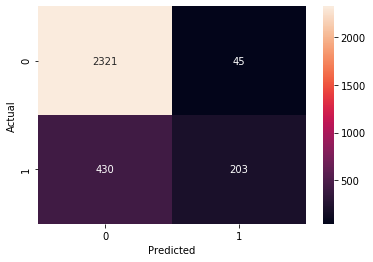

In [95]:
# Show confusion matrix for tuned random forest model
cm2 = confusion_matrix(Y_test, y_pred2)
sns.heatmap(cm2, annot= True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

* After tuning, accuracy improved and false negative decreased; which is better than KNN model

## Pickle Model

In [96]:
import pickle

In [97]:
with open('model_pickle', 'wb') as f:
    pickle.dump(grid_model, f)

## Load Model

In [98]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

## Predict of Churn of Existing Staying Customers

In [99]:
# Extract only existing staying customers data
P = Final_data[Final_data.Exited == 0]
P

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
1,15647311,0,2,0,2,1,1,1,0,1,2,0
3,15701354,2,0,0,1,1,0,2,0,0,1,0
4,15737888,3,2,0,2,2,2,1,1,1,1,0
8,15792365,0,0,1,2,4,2,2,0,1,1,0
9,15592389,1,0,1,1,2,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,15569266,1,0,1,1,7,3,1,1,0,0,0
9994,15719294,3,0,0,1,2,0,2,0,0,3,0
9995,15606229,3,0,1,1,5,0,2,1,0,1,0
9996,15569892,0,0,1,1,10,1,1,1,1,2,0


In [100]:
# Drop CustomerId and Exited Columns
P = P.drop(['CustomerId', 'Exited'] ,  axis=1)
P.head()

,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary
1,0,2,0,2,1,1,1,0,1,2
3,2,0,0,1,1,0,2,0,0,1
4,3,2,0,2,2,2,1,1,1,1
8,0,0,1,2,4,2,2,0,1,1
9,1,0,1,1,2,2,1,1,1,1


In [101]:
# Load data into Pickle model
a = mp.predict(P)

In [102]:
# Convert predicted data into dataframe
numpy_data = np.array(a)
df_pred = pd.DataFrame(data=numpy_data, columns=["Predictions"])
df_pred

,Predictions
0,0
1,0
2,0
3,1
4,0
...,...
7955,0
7956,1
7957,0
7958,0


In [103]:
# Concat the predictions with the existing staying customers data
P.reset_index(drop=True, inplace=True)
df_pred.reset_index(drop=True, inplace=True)
Pred_data = pd.concat([P, df_pred], axis= 1)
Pred_data

,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Predictions
0,0,2,0,2,1,1,1,0,1,2,0
1,2,0,0,1,1,0,2,0,0,1,0
2,3,2,0,2,2,2,1,1,1,1,0
3,0,0,1,2,4,2,2,0,1,1,1
4,1,0,1,1,2,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
7955,1,0,1,1,7,3,1,1,0,0,0
7956,3,0,0,1,2,0,2,0,0,3,1
7957,3,0,1,1,5,0,2,1,0,1,0
7958,0,0,1,1,10,1,1,1,1,2,0


0    5283
1    2677
Name: Predictions, dtype: int64


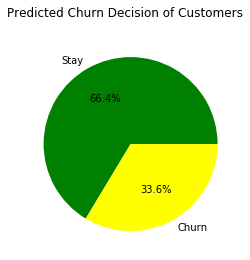

In [104]:
# Predictions of customer churn
print(Pred_data.Predictions.value_counts())
plt.pie(Pred_data.Predictions.value_counts(),    #giving array
       labels = ['Stay', 'Churn'], #Correspndingly giving labels
       colors = ['green', 'yellow'],   # Corresponding colors
       autopct= '%.1f%%',
       startangle = 0)  # rotating counterclockwise from x axis

plt.suptitle('Predicted Churn Decision of Customers')
plt.show()

In [105]:
# Only extract those with predicted churn for analysis
pred_churn = Pred_data[Pred_data.Predictions == 1]
pred_churn.head()

,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Predictions
3,0,0,1,2,4,2,2,0,1,1,1
5,0,0,1,1,6,2,2,0,0,1,1
7,0,0,0,1,10,0,2,1,0,0,1
8,0,0,0,0,5,0,2,0,0,3,1
10,0,1,1,2,3,2,2,0,1,1,1


0    1104
1     693
3     610
2     270
Name: CredRate, dtype: int64


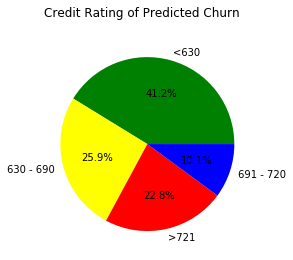

In [106]:
# Credit Rating Breakdown of Predicted Churn Customers
print(pred_churn.CredRate.value_counts())
plt.pie(pred_churn.CredRate.value_counts(),    #giving array
       labels = ['<630', '630 - 690', '>721', '691 - 720'], #Correspndingly giving labels
       colors = ['green', 'yellow', 'red', 'blue'],   # Corresponding colors
       autopct= '%.1f%%',
       startangle = 0)  # rotating counterclockwise from x axis

plt.suptitle('Credit Rating of Predicted Churn')
plt.show()

0    1168
1     911
2     598
Name: Geography, dtype: int64


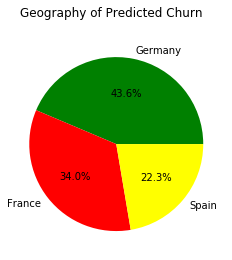

In [107]:
# Geography Breakdown of Predicted Churn Customers
print(pred_churn.Geography.value_counts())
plt.pie(pred_churn.Geography.value_counts(),    #giving array
       labels = ['Germany', 'France', 'Spain'], #Correspndingly giving labels
       colors = ['green', 'red', 'yellow'],   # Corresponding colors
       autopct= '%.1f%%',
       startangle = 0)  # rotating counterclockwise from x axis

plt.suptitle('Geography of Predicted Churn')
plt.show()

1    1397
0    1280
Name: Gender, dtype: int64


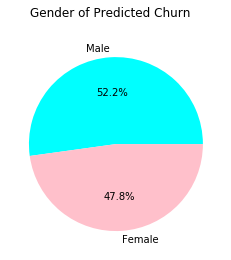

In [108]:
# Gender Breakdown of Predicted Churn Customers
print(pred_churn.Gender.value_counts())
plt.pie(pred_churn.Gender.value_counts(),    #giving array
       labels = ['Male', 'Female'], #Correspndingly giving labels
       colors = ['Cyan', 'Pink'],   # Corresponding colors
       autopct= '%.1f%%',
       startangle = 0)  # rotating counterclockwise from x axis

plt.suptitle('Gender of Predicted Churn')
plt.show()

1    1375
2     923
3     192
0     133
4      54
Name: Age, dtype: int64


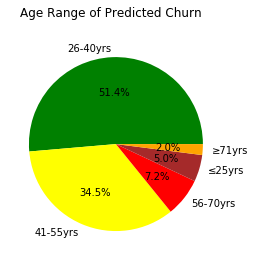

In [109]:
# Age Breakdown of Predicted Churn Customers
print(pred_churn.Age.value_counts())
plt.pie(pred_churn.Age.value_counts(),    #giving array
       labels = ['26-40yrs', '41-55yrs', '56-70yrs', '≤25yrs', '≥71yrs'], #Correspndingly giving labels
       colors = ['green', 'yellow', 'red', 'brown', 'orange'],   # Corresponding colors
       autopct= '%.1f%%',
       startangle = 0)  # rotating counterclockwise from x axis

plt.suptitle('Age Range of Predicted Churn')
plt.show()

In [110]:
# Tenure Breakdown of Predicted Churn Customers
pred_churn.Tenure.value_counts()

2     346
5     288
9     278
7     278
6     260
8     255
4     249
3     248
1     229
10    154
0      92
Name: Tenure, dtype: int64

0    1003
2     995
1     404
3     270
4       5
Name: Balance, dtype: int64


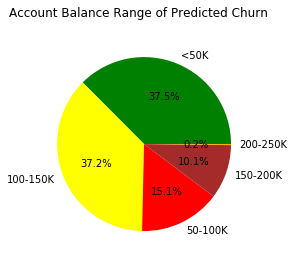

In [111]:
# Account Balance Breakdown of Predicted Churn Customers
print(pred_churn.Balance.value_counts())
plt.pie(pred_churn.Balance.value_counts(),    #giving array
       labels = ['<50K', '100-150K', '50-100K', '150-200K', '200-250K'], #Correspndingly giving labels
       colors = ['green', 'yellow', 'red', 'brown', 'orange'],   # Corresponding colors
       autopct= '%.1f%%',
       startangle = 0)  # rotating counterclockwise from x axis

plt.suptitle('Account Balance Range of Predicted Churn')
plt.show()

2    2645
3      30
1       2
Name: Prod Number, dtype: int64


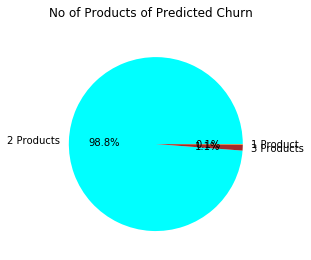

In [112]:
# Sum of Products Breakdown of Predicted Churn Customers
print(pred_churn['Prod Number'].value_counts())
plt.pie(pred_churn['Prod Number'].value_counts(),    #giving array
       labels = ['2 Products', '3 Products', '1 Product'], #Correspndingly giving labels
       colors = ['cyan', 'brown', 'orange'],   # Corresponding colors
       autopct= '%.1f%%',
       startangle = 0)  # rotating counterclockwise from x axis

plt.suptitle('No of Products of Predicted Churn')
plt.show()

1    1897
0     780
Name: HasCrCard, dtype: int64


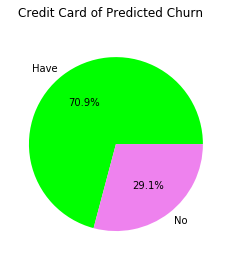

In [113]:
# Credit Card Breakdown of Predicted Churn Customers
print(pred_churn.HasCrCard.value_counts())
plt.pie(pred_churn.HasCrCard.value_counts(),    #giving array
       labels = ['Have', 'No'], #Correspndingly giving labels
       colors = ['lime', 'violet'],   # Corresponding colors
       autopct= '%.1f%%',
       startangle = 0)  # rotating counterclockwise from x axis

plt.suptitle('Credit Card of Predicted Churn')
plt.show()

1    1394
0    1283
Name: ActMem, dtype: int64


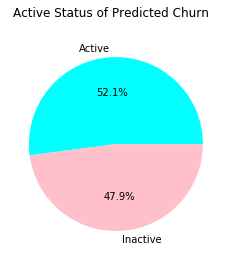

In [114]:
# Active/Inactive Status of Predicted Churn Customers
print(pred_churn.ActMem.value_counts())
plt.pie(pred_churn.ActMem.value_counts(),    #giving array
       labels = ['Active', 'Inactive'], #Correspndingly giving labels
       colors = ['Cyan', 'Pink'],   # Corresponding colors
       autopct= '%.1f%%',
       startangle = 0)  # rotating counterclockwise from x axis

plt.suptitle('Active Status of Predicted Churn')
plt.show()

3    786
2    697
1    641
0    553
Name: EstimatedSalary, dtype: int64


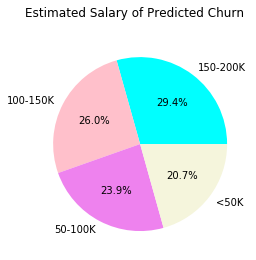

In [115]:
# Estimated Salary Breakdown of Predicted Churn Customers
print(pred_churn.EstimatedSalary.value_counts())
plt.pie(pred_churn.EstimatedSalary.value_counts(),    #giving array
       labels = ['150-200K', '100-150K', '50-100K', '<50K'], #Correspndingly giving labels
       colors = ['Cyan', 'Pink', 'violet', 'beige'],   # Corresponding colors
       autopct= '%.1f%%',
       startangle = 0)  # rotating counterclockwise from x axis

plt.suptitle('Estimated Salary of Predicted Churn')
plt.show()